In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate
import yfinance as yf
%matplotlib inline

ticker= "tsla"
stock_data = yf.download(ticker, start="2016-01-04", end="2021-06-25")

[*********************100%***********************]  1 of 1 completed


In [2]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500
2016-01-08,43.571999,44.088001,42.153999,42.200001,42.200001,18140500


<AxesSubplot:xlabel='Date'>

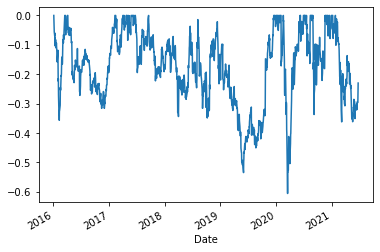

In [3]:
daily_close_pct_change = stock_data['Adj Close'].pct_change()
wealth_index = 1000 * (1 + daily_close_pct_change).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [9]:
daily_close_pct_change.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change.quantile(0.1)
VaR_95 = daily_close_pct_change.quantile(0.05)
VaR_99 = daily_close_pct_change.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0334543
95%                      -0.0497764
99%                      -0.0899412


In [10]:
CVaR_90 = daily_close_pct_change[daily_close_pct_change <= VaR_90].mean()
CVaR_95 = daily_close_pct_change[daily_close_pct_change <= VaR_95].mean()
CVaR_99 = daily_close_pct_change[daily_close_pct_change <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))

Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                  -0.0604026
95%                                                  -0.0802921
99%                                                  -0.136757
